## **Fake News Detection**

# Model Training

Import Library

In [1]:
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import pandas as pd
import seaborn as sb
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Import Data

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WELFake_Dataset.csv"

# Load the latest version
df_wel = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "saurabhshahane/fake-news-classification",
  file_path,
)

df_wel.head(10)

<ipython-input-2-2a95d09fa5b0>:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_wel = kagglehub.load_dataset(


100%|██████████| 92.1M/92.1M [00:01<00:00, 61.1MB/s]

Extracting zip of WELFake_Dataset.csv...


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [3]:
# import kagglehub
# from kagglehub import KaggleDatasetAdapter

# # Set the path to the file you'd like to load
# file_path = "fake.csv"

# # Load the latest version
# df_fake = kagglehub.load_dataset(
#   KaggleDatasetAdapter.PANDAS,
#   "bhavikjikadara/fake-news-detection",
#   file_path,
# )

# df_fake.head(10)

<ipython-input-3-7d368832c431>:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_fake = kagglehub.load_dataset(


100%|██████████| 22.9M/22.9M [00:00<00:00, 57.8MB/s]

Extracting zip of fake.csv...


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
# file_path = "true.csv"
# # Load the latest version
# df_real = kagglehub.load_dataset(
#   KaggleDatasetAdapter.PANDAS,
#   "bhavikjikadara/fake-news-detection",
#   file_path,
# )
# df_fake.head()

<ipython-input-4-08c92c07e961>:3: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_real = kagglehub.load_dataset(


100%|██████████| 18.1M/18.1M [00:00<00:00, 78.8MB/s]

Extracting zip of true.csv...


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [36]:
# df_fake['Label'] = 0
# df_real['Label'] = 1
# df = pd.concat([df_fake,df_real])
df_wel = df_wel.rename(columns={"label": "Label"})
# df = pd.concat([df,df_wel])
df = df_wel
df.head()

,Unnamed: 0,title,text,Label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [37]:
print(f'Data rows: {df.shape[0]}, Data columns: {df.shape[1]}')

Data rows: 72134, Data columns: 4


In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df["Statement"] = df["title"].astype(str) + " " + df["text"].astype(str)

In [40]:
print(f'Data rows: {df.shape[0]}, Data columns: {df.shape[1]}')

Data rows: 72134, Data columns: 5


In [41]:
df.head()

,Unnamed: 0,title,text,Label,Statement
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,NaN,Did they post their votes for Hillary already?,1,nan Did they post their votes for Hillary alre...
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


In [42]:
df = df[['Statement', 'Label']]
df.head()

,Statement,Label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,nan Did they post their votes for Hillary alre...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1


In [43]:
print(f'Data rows: {df.shape[0]}, Data columns: {df.shape[1]}')

Data rows: 72134, Data columns: 2


In [44]:
df.isna().sum()

,0
Statement,0
Label,0


In [45]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print(f'Data rows after cleaning: {df.shape[0]}, Data columns after cleaning: {df.shape[1]}')

<ipython-input-45-a27f820c756e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Data rows after cleaning: 63678, Data columns after cleaning: 2


<ipython-input-45-a27f820c756e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [46]:
df = df.sample(frac = 1)

In [47]:
df.head()

,Statement,Label
25959,Suspected al Qaeda fighters among four Syrians...,0
49945,Nigerian army says it repels suspected Boko Ha...,0
9973,TREY GOWDY Embarrasses Gun-Grabbing Obama Offi...,1
13189,"This Major U.S. City Is Now So Polluted, Peop...",1
9410,Donald Trump’s Claim That He’s The Strongest ...,1


In [48]:
import string
def clean_text(text):
    # Converting all text to lowercase
    text = text.lower()

    # Delete link/URL
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    # Delete emoji and characters non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Normalize Words
    text = re.sub(r"won\'t", "would not", text)
    text = re.sub(r"im", "i am", text)
    text = re.sub(r"Im", "i am", text)
    text = re.sub(r"dont", "do not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    # Remove punctuation and other symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Delete numbers
    text = re.sub(r'\d+', ' ', text)

    # Removing double spaces that may form
    text = re.sub(r'\s+', ' ', text).strip()

    # Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text
df['Statement'] = df['Statement'].apply(clean_text)

# Example usage
sample_text = "Breaking News! Fake news spreads quickly on social media. 349&&& safk asf"
print(clean_text(sample_text))

breaking news fake news spreads quickly on social media safk asf


In [49]:
df.sample(5)

,Statement,Label
41558,peshmerga forces won t enter iraq s mosul kurd...,1
29262,bill clinton caught on tape told mistress to d...,1
45049,why the death of justice scalia makes the supr...,1
55156,palestinians switch off christmas lights in be...,0
56997,at least killed after militants target mosque ...,0


In [50]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.split()
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(processed_words)

df['Statement'] = df['Statement'].apply(preprocess_text)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63678 entries, 25959 to 20686
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  63678 non-null  object
 1   Label      63678 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


<ipython-input-52-9bf9efb7e872>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='Label', data=dataFile, palette='hls')


<Axes: xlabel='Label', ylabel='count'>

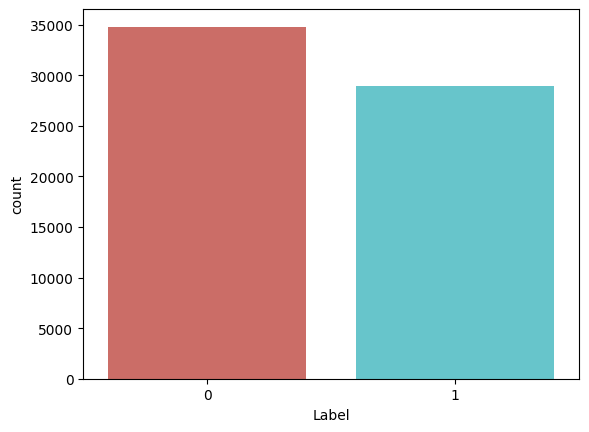

In [52]:
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(df)

In [53]:
def data_qualityCheck():
    print("Checking data qualitites...")
    df.isnull().sum()
    df.info()
    print("check finished.")
data_qualityCheck()

df = df.dropna()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Index: 63678 entries, 25959 to 20686
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  63678 non-null  object
 1   Label      63678 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB
check finished.


In [54]:
print(df.columns)
df.shape
print(df.columns)

Index(['Statement', 'Label'], dtype='object')
Index(['Statement', 'Label'], dtype='object')


In [55]:
print(df.columns)
df.reset_index(drop= True,inplace=True)
df.head(10)

Index(['Statement', 'Label'], dtype='object')


,Statement,Label
0,suspect al qaeda fighter among four syrian arr...,0
1,nigerian armi say repel suspect boko haram mil...,0
2,trey gowdi embarrass gun grab obama offici bri...,1
3,major u citi pollut peopl asthma choke death v...,1
4,donald trump clai strongest gop candid ever bu...,1
5,clinton sander eclips challeng st debat la veg...,0
6,allergen vaccin caus life threaten food allerg...,1
7,ford new ceo snub presid trump build focu chin...,1
8,jeff session ask chicago fail obama appoint fe...,0
9,watch ted cruz refus endors trump gop convent ...,1


In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df.Label = label_encoder.fit_transform(df.Label)

In [57]:
Label_train = df.Label


In [58]:
Label_train.head(10)


,Label
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,1
8,0
9,1


In [59]:
# df.drop('Label', axis=1, inplace=True)

In [60]:
df.head(10)

,Statement,Label
0,suspect al qaeda fighter among four syrian arr...,0
1,nigerian armi say repel suspect boko haram mil...,0
2,trey gowdi embarrass gun grab obama offici bri...,1
3,major u citi pollut peopl asthma choke death v...,1
4,donald trump clai strongest gop candid ever bu...,1
5,clinton sander eclips challeng st debat la veg...,0
6,allergen vaccin caus life threaten food allerg...,1
7,ford new ceo snub presid trump build focu chin...,1
8,jeff session ask chicago fail obama appoint fe...,0
9,watch ted cruz refus endors trump gop convent ...,1


In [61]:
df['Statement'][2188]

'amid nuclear standoff frozen n korea debt untrad due sanction london reuter seen opportun investor posit futur north korean turnaround countri rare trade default debt may move twilight zone new sanction ampos week pyongyang debt north korea probabl isol frontier market alreadi frozen year secret nation face stringent sanction regi ame world part highli opaqu market legaci debt countri isol rest intern commun pre castro cuban debt north korea syndic loan face valu around billion tie loan default sinc undertaken restructur creditor debt repackag special vehicl call nk debt corpor french bank bnp make transfer secur total debt accumul borrow heavili western bank back includ princip accumul interest amount billion washington dc base think tank peterson institut intern econom esti amat secur regularli trade sinc around accord stuart culverhous head research exotix capit price spurt higher death presid ki jong il hope son ki jong un north korea new swiss educ leader would make progress inte

In [62]:
Label_train

,Label
0,0
1,0
2,1
3,1
4,1
...,...
63673,1
63674,0
63675,0
63676,0


In [63]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [64]:
stpwrds

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [65]:
print(df.columns)

Index(['Statement', 'Label'], dtype='object')


In [66]:
for x in range(len(df)) :
    corpus = []
    review = df['Statement'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    df.loc[x,'Statement'] = review

In [67]:
Statement_train = df.Statement

In [68]:
Statement_train.head()

,Statement
0,suspect al qaeda fighter among four syrian arr...
1,nigerian armi say repel suspect boko haram mil...
2,trey gowdi embarrass gun grab obama offici bri...
3,major u citi pollut peopl asthma choke death v...
4,donald trump clai strongest gop candid ever bu...


In [70]:
#First split: train (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(Statement_train, Label_train, test_size=0.4, random_state=42, stratify=Label_train)

# Second split: temp into val (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [71]:
X_train.shape, y_train.shape
X_val.shape, y_val.shape
X_test.shape, y_test.shape

((12736,), (12736,))

In [72]:
X_train

,Statement
9662,liber nightmar hundr voter withdraw registr st...
24614,lol one word describ hillari perfectli appear ...
2592,donald trump v berni sander confus reign possi...
33436,clinton lead trump percent washington post abc...
53453,two new jersey mom attack commun expo islam in...
...,...
15147,london setback may win brexit cheer brussel br...
14081,pm elect day water cooler hegel remark somewhe...
56949,carrier worker blast trump lie as donald trump...
18802,jake tapper stun trump stupid shred denial glo...


In [73]:
y_train

,Label
9662,1
24614,1
2592,0
33436,0
53453,1
...,...
15147,0
14081,1
56949,1
18802,1


In [74]:
X_val

,Statement
16540,putin say u hysteria russia elect ploy krasnay...
52933,democrat decay fbi reopen hillari investig evi...
39103,hous panel probe possibl russia trump campaign...
36576,minut video clinton foundat chariti scam obvio...
62127,volatil kenya mp former senat detain hate spee...
...,...
61281,univers california worker sue lose job outsour...
8309,colleg professor caught tape peac white exist ...
27055,texa mayor announc transgend new york ti ame d...
36888,america surviv next year share citizen unit st...


In [75]:
# from google.colab import drive
# drive.mount('/content/drive')

# Make sure the directory exists
# save_path = "/content/drive/MyDrive/models/tfidf_vectorizer2.pkl"

# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
vec_X_train = vectorizer.fit_transform(X_train)
vec_X_val = vectorizer.transform(X_val)
vec_X_test = vectorizer.transform(X_test)

# Save the trained vectorizer
# with open(save_path, "wb") as file:
#     pickle.dump(vectorizer, file)

# print(f"Vectorizer saved at: {save_path}")

In [76]:
vec_X_train.shape, vec_X_test.shape

((38206, 5000), (12736, 5000))

In [77]:
import itertools

import numpy as np


def plot_confusion_matrix(cm, classes,title,
                          normalize=False,
                          cmap=plt.cm.Blues):

    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Top 3 impactful parameters
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

# Grid search
grid = GridSearchCV(
    RandomForestClassifier(random_state=0),
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(vec_X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9134952554369891


In [93]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Step 1: Base models
models = {
    # "Naive Bayes": MultinomialNB(),
    # "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(max_depth= 20, min_samples_split= 2, n_estimators= 100,random_state=0),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    # "SVM (C=2)" : SVC(kernel='linear', C=2)
}



Mounted at /content/drive
Random Forest Accuracy: 91.14%
Confusion matrix, without normalization


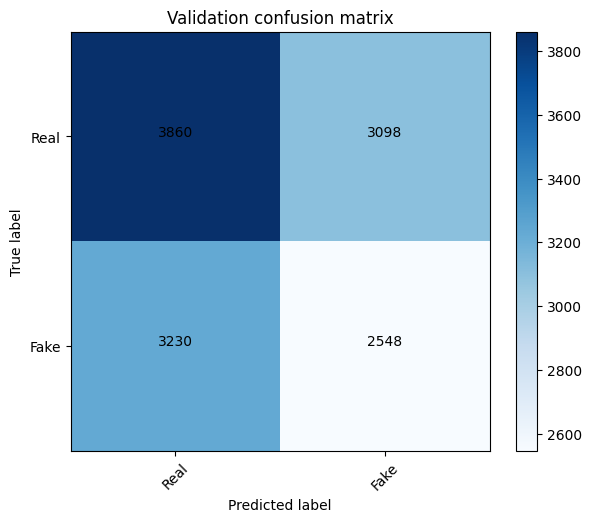

In [94]:
import numpy as np
from sklearn import metrics
import pickle
import os
from google.colab import drive
drive.mount('/content/drive')


for name, model in models.items():
    model.fit(vec_X_train, y_train)
    y_pred = model.predict(vec_X_val)
    acc = metrics.accuracy_score(y_val, y_pred)
    print(f'{name} Accuracy: {round(acc*100,2)}%')
    plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ['Real', 'Fake'],"Validation confusion matrix")

    name = "Random Forest"
    model_path = f"/content/drive/My Drive/models/{name.replace(' ', '_').lower()}.pkl"
    vectorizer_path = f"/content/drive/My Drive/models/{name.replace(' ', '_').lower()}_vectorizer.pkl"

    # Make sure the directory exists
    os.makedirs("/content/drive/My Drive/models", exist_ok=True)

    # Save model
    with open(model_path, "wb") as f:
      pickle.dump(model, f)


Random Forest Accuracy: 91.47%
Confusion matrix, without normalization


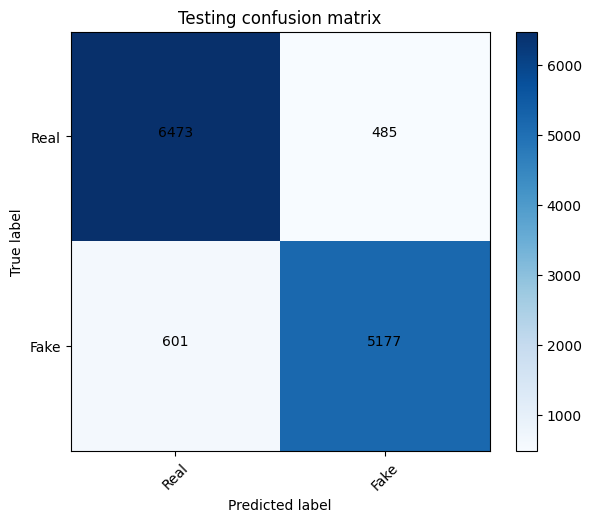

In [95]:
accuracies = {}
for name, model in models.items():
    model.fit(vec_X_train, y_train)
    y_pred = model.predict(vec_X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f'{name} Accuracy: {round(acc*100,2)}%')
    plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ['Real', 'Fake'],"Testing confusion matrix")

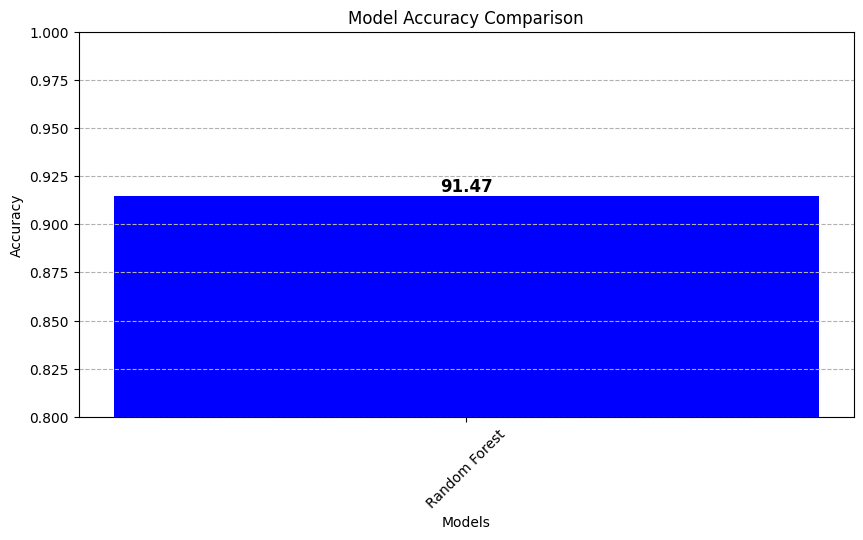

In [96]:
# Plot improved accuracy comparison graph
plt.figure(figsize=(10,5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])

# Adding value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval*100,2)}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0.8, 1)  # Accuracy y-axis ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()


# Model Testing

In [97]:
print(models)

{'Random Forest': RandomForestClassifier(max_depth=20, random_state=0)}


In [98]:
import pandas as pd

def output_label(n):
    return "Fake News" if n == 0 else "Not A Fake News"

def manual_testing(news):
    # Ensure 'models' contains trained models
    for name, model in models.items():  # FIXED: Use `models.items()` instead of `models()`

        # Create a DataFrame for input news
        testing_news = {"text": [news]}
        new_def_test = pd.DataFrame(testing_news)

        # Apply text preprocessing (Ensure 'clean_text' is defined)
        new_def_test['text'] = new_def_test["text"].apply(clean_text)

        # Transform input using the loaded vectorizer
        new_xv_test = vectorizer.transform(new_def_test["text"])

        # Get model predictions
        test_pred = model.predict(new_xv_test)

        # Print prediction correctly
        print(f"{name} Prediction: {output_label(test_pred[0])}")  # FIXED: Index test_pred

In [99]:
news ="Federal health officials told the AP they have not received any reports of Ebola cases at the Nevada event. A screenshot of a supposed post from the Centers for Disease Control and Prevention confirming such cases was fabricated. And there is no record of a national emergency being declared. The claims emerged after summer storm left muddy roads flooded, stranding tens of thousands of partygoers; event organizers let traffic flow out of the main road Monday afternoon. “So it was announced earlier that Burning Man was declared a national emergency because it was flooded, and so they sent in FEMA,” a woman claims in a TikTok video shared on Instagram, suggesting the development was suspicious. The AP found no record, including on federal websites and in White House announcements, of a national emergency declaration and FEMA confirmed that it was not involved in the situation. “No FEMA personnel or assets have been deployed to the Burning Man festival and there are no requests from local or state authorities for our assistance,” FEMA spokesperson Jeremy Edwards said in an email. The TikTok video, like other posts, goes on to relay baseless rumors of reported cases of Ebola, whose occasional outbreaks in humans primarily occur in Africa, at the festival. Some posts also shared an image made to appear that the CDC confirmed the supposed outbreak on X, the platform formerly known as Twitter. The purported X post from the agency reads, “Ebola outbreak confirmed at Black Rock City, NV. It is recommended that all Burning Man attendees remain in their dwellings until further notice. Current State of Emergency in progress.” But the CDC’s X account published no such post. “CDC has not received any reports of Ebola at the Burning Man Festival and has not issued any warnings or had any requests for assistance from the state and local health departments either,” agency spokesperson Scott Pauley said in an email. Reverse image searches further show that a graphic about Ebola used in the fictitious CDC post was published by the agency in 2016, but elements of it were changed. For example, the original graphic asks, “Recently in West Africa?” But the version used in the made-up X post asks, “Recently in Nevada?” Referencing more online rumors, Pauley also noted the CDC had not received reports of mpox, formerly known as monkeypox, or Marburg, a rare but severe hemorrhagic fever, in relation to Burning Man. A representative for the Burning Man Project organization also refuted the online claims. “Quite simply, the online rumors of transmissible illnesses in Black Rock City are unfounded and untrue,” Dominique Debucquoy-Dodley said in an email. The festival had been closed to vehicles after more than a half-inch (1.3 centimeters) of rain fell Sept. 1, causing flooding and foot-deep mud, as the AP reported. The annual gathering, which launched on a San Francisco beach in 1986, attracts nearly 80,000 artists, musicians and activists for a mix of wilderness camping and avant-garde performances"
manual_testing(news)

Random Forest Prediction: Not A Fake News


In [100]:
news = "MOSCOW (Reuters) - Russiaâ€™s former ambassador to Washington, Sergei Kislyak, said on Saturday his conversations with former White House national security adviser Michael Flynn had been transparent and focused on matters of U.S.-Russia cooperation. Kislyak ended his tenure in Washington in July but remains a key figure in ongoing U.S. investigations into Moscowâ€™s alleged meddling in the 2016 presidential election. Flynn was forced to resign in February after it became known that he had failed to disclose the content of conversations he had with Kislyak and misled U.S. Vice-President Mike Pence about their meetings. â€œWe only spoke about the most simple things ... but the communication was completely correct, calm, absolutely transparent. In any case, there were no secrets on our side,â€ Kislyak said during a panel discussion on Russian television. â€œThere are a number of issues which are important for cooperation between Russia and the United States - most of all, terrorism. And that was one of the things we discussed.â€"
manual_testing(news)

Random Forest Prediction: Fake News


In [101]:
news = "One of Donald Trump s favorite punching bags is CNN. He even once tweeted a GIF image of himself punching a person with a CNN logo superimposed over the head indicating that he d like to enact violence against CNN s reporters. Then there was the time he tweeted the  Trump Train roaring over  CNN.  Now, he s back at it this time suggesting that  fake  CNN should be the ones representing America to the world, and that they are doing a bad job. Here is that tweet:.@FoxNews is MUCH more important in the United States than CNN, but outside of the U.S., CNN International is still a major source of (Fake) news, and they representour Nation to the WORLD very poorly. The outside world does not see the truth from them!  Donald J. Trump (@realDonaldTrump) November 25, 2017Of course, it is beneath the dignity of most people to respond to a moronic buffoon like Trump under normal circumstances. However, he is currently squatting in the White House, and has his tiny orange hands on the levers of power   not to mention the nuclear codes   so they have to stoop to a Trumpian level when personally attacked. However, being, well, you know, FIT to be doing the job they are doing, the good folks at CNN Communications fired back at Trump, and their response is nothing short of perfect:It's not CNN's job to represent the U.S to the world. That's yours. Our job is to report the news. #FactsFirst   CNN Communications (@CNNPR) November 25, 2017BOOM! Couldn t have asked for a sicker burn than this. And they are right of course   especially the part about#FactsFirst. Trump has a problem with the truth, as we all well know. That s what makes what the CNN Communications people replied so fabulous. It is the ultimate truth   something the likes of the pathological orange liar that is Donald Trump knows nothing about.Featured image via  Andrew Burton/Getty Images"
manual_testing(news)

Random Forest Prediction: Not A Fake News


In [102]:
news = "WASHINGTON (Reuters) - The No. 2 Republican in the U.S. House of Representatives said on Tuesday the House would likely need to vote again on taxlegislation on Wednesday morning given that Democrats in the Senate were likely to prevail on a procedural objection. House Majority Leader Kevin McCarthy advised House lawmakers that Senate Democrats were likely to object that the legislation fails to comply with the so-called Byrd rule and were likely to beupheld, necessitating a second House vote. “As such, members are further advised that an additional procedural vote on the Motion to Concur is expected tomorrow morning, which will clear the bill for President Trump’s signature,” McCarthy said in a notice to House lawmakers."
manual_testing(news)

Random Forest Prediction: Fake News
